### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()

### Load study

In [2]:
# Define study
STUDY_NAME = "injection_tune_scan_oct_phase"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

In [3]:

# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

In [4]:
df_neg_no_phase = df[(df['i_oct_b1'] == -45.0) & (df['phase_change.b1'] == 0.0)]
df_pos_no_phase = df[(df['i_oct_b1'] == 45.0) & (df['phase_change.b1'] == 0.0)]
df_neg_phase = df[(df['i_oct_b1'] == -45.0) & (df['phase_change.b1'] == 1.0)]
df_pos_phase = df[(df['i_oct_b1'] == 45.0) & (df['phase_change.b1'] == 1.0)]

### Plot

In [5]:
# Reshape for plotting
df_neg_no_phase_to_plot = df_neg_no_phase.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_pos_no_phase_to_plot = df_pos_no_phase.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_neg_phase_to_plot = df_neg_phase.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_pos_phase_to_plot = df_pos_phase.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")

# For nan in each df, replace value with cubic interpolation
df_neg_no_phase_to_plot = df_neg_no_phase_to_plot.interpolate(method="cubic", axis=1)
df_pos_no_phase_to_plot = df_pos_no_phase_to_plot.interpolate(method="cubic", axis=1)
df_neg_phase_to_plot = df_neg_phase_to_plot.interpolate(method="cubic", axis=1)
df_pos_phase_to_plot = df_pos_phase_to_plot.interpolate(method="cubic", axis=1)

l_df_to_plot = [df_neg_no_phase_to_plot, df_pos_no_phase_to_plot, df_neg_phase_to_plot, df_pos_phase_to_plot]

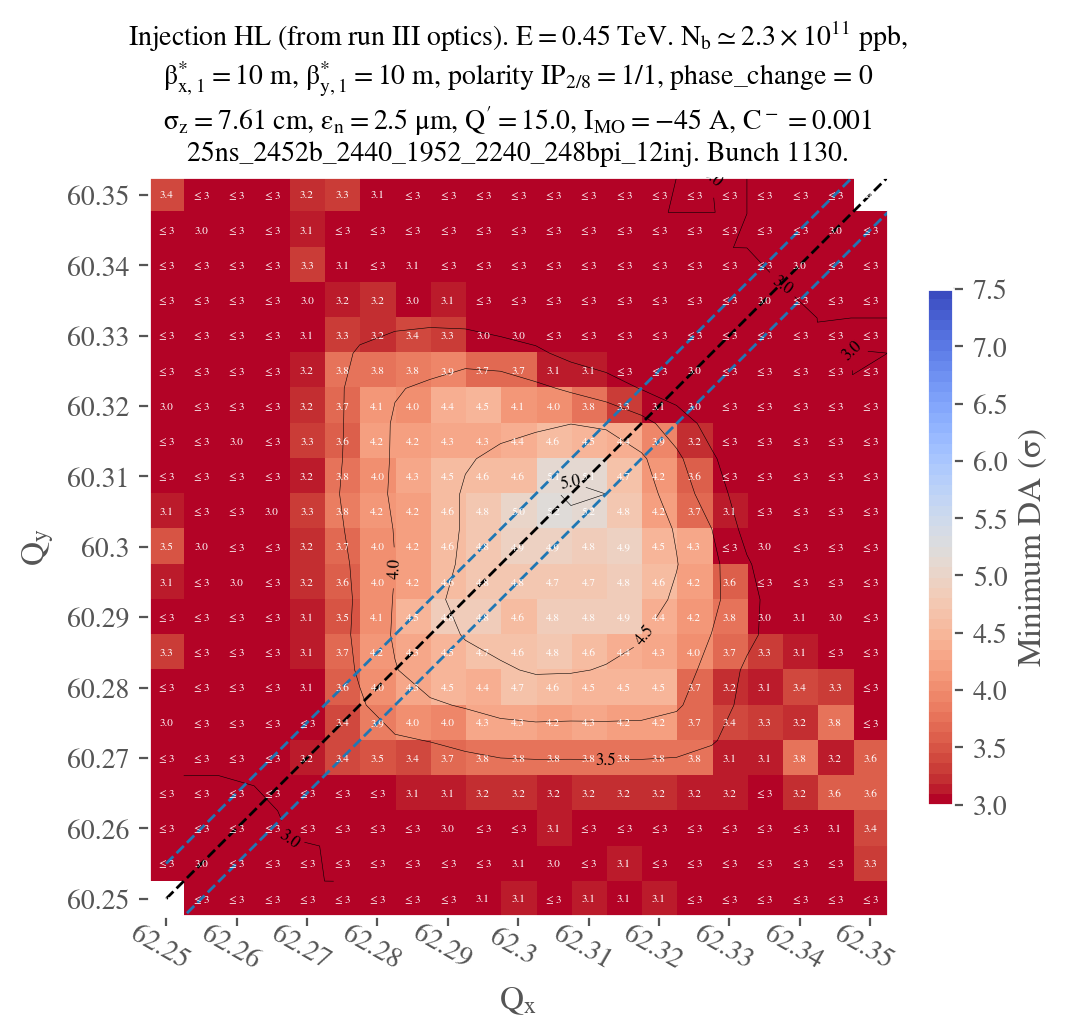

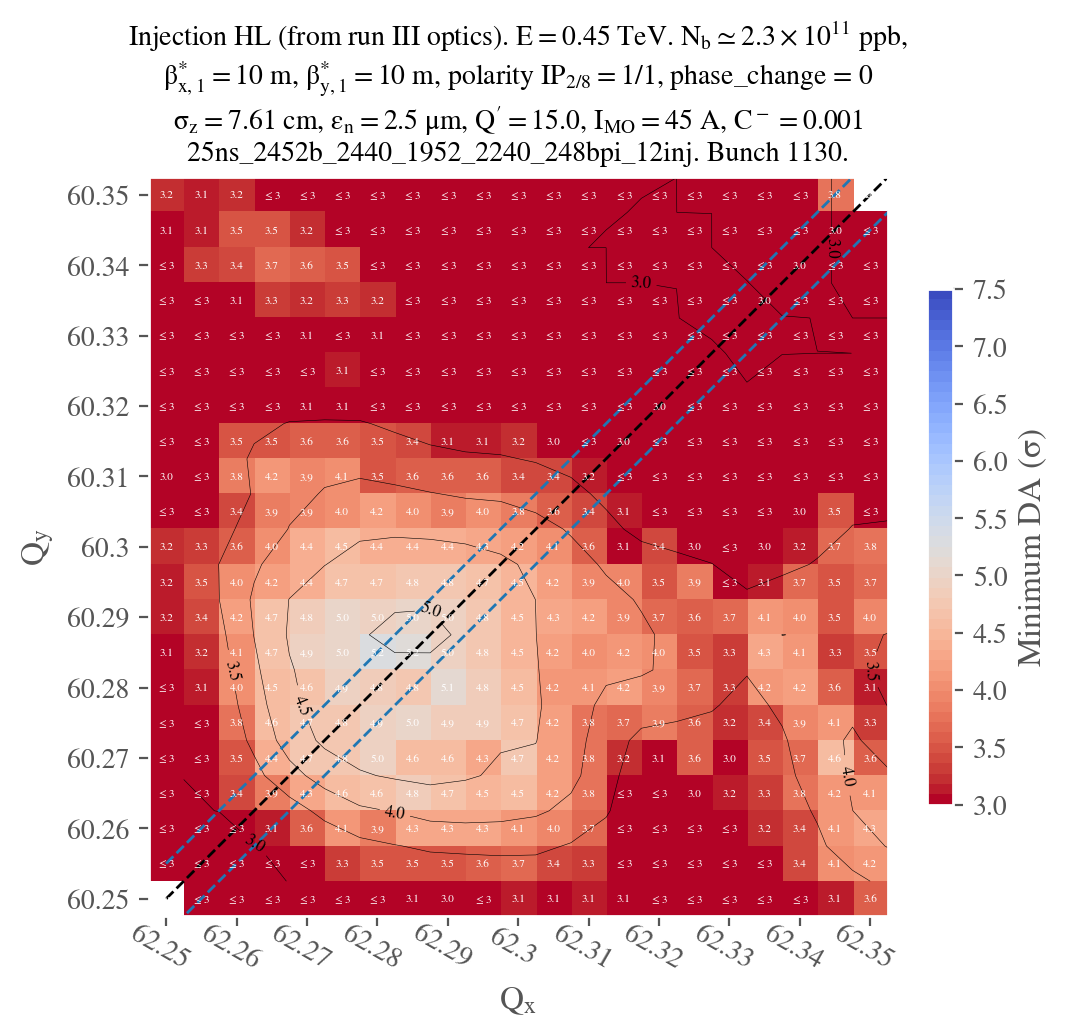

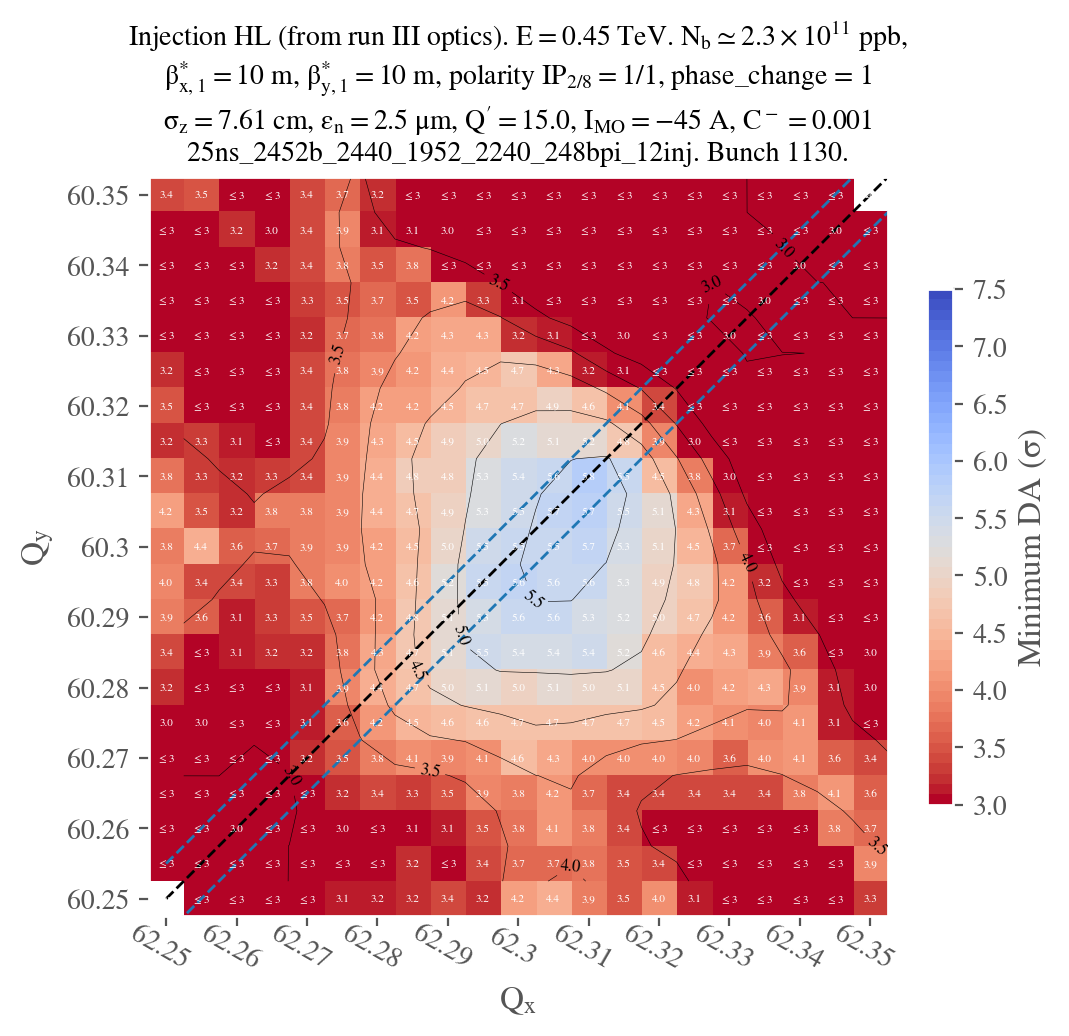

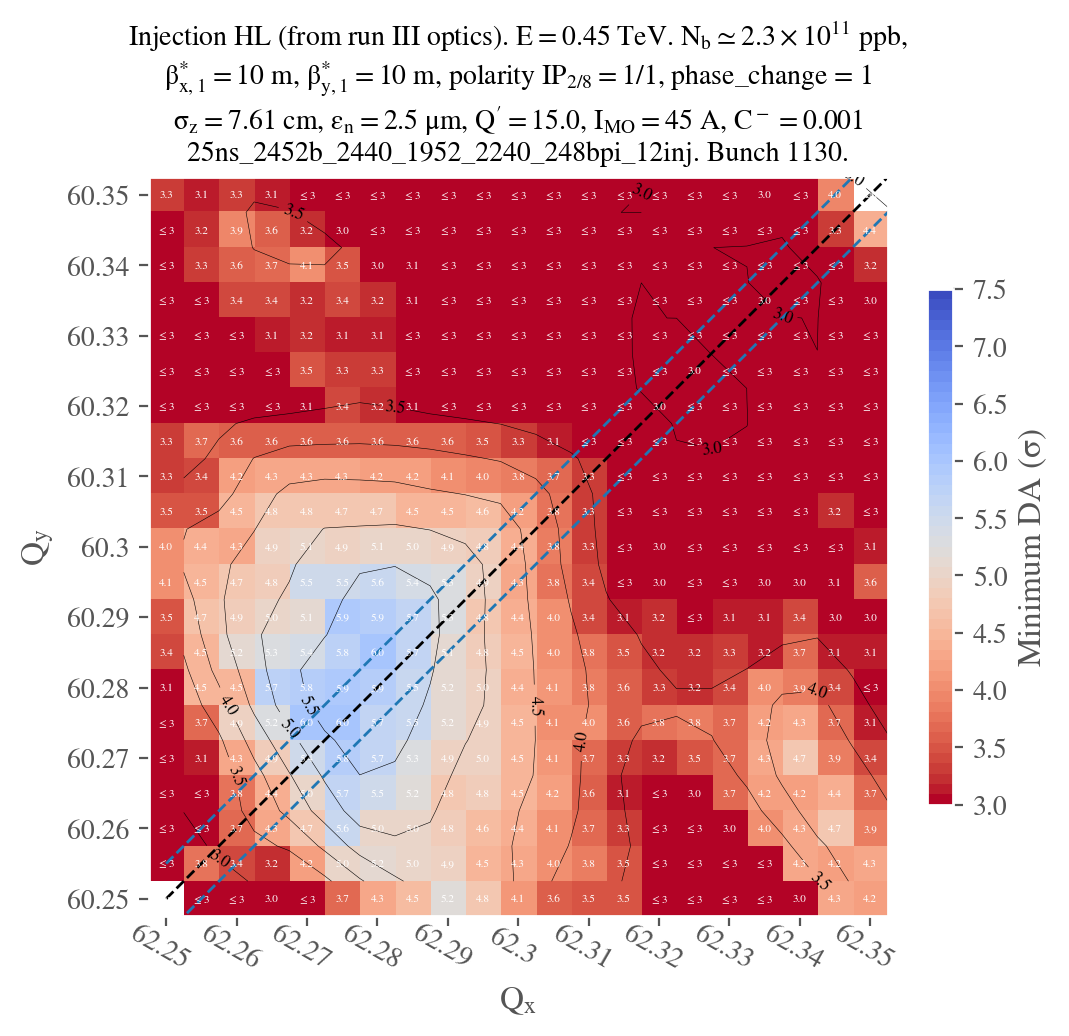

In [6]:
for df_to_plot, octupoles, phase in zip(l_df_to_plot, [-45,45,-45,45], [0,0,1,1]):
    # Load configuration files
    conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
    conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

    xlabel = r"$Q_x$"
    ylabel = r"$Q_y$"
    analysis_functions.plot_heatmap(
        df_to_plot,
        STUDY_NAME + f"_oct_{octupoles}_phase_{phase}",
        link=None,
        plot_contours=True,
        conf_mad=conf_mad,
        conf_collider=conf_collider,
        betx = 10,
        bety = 10,
        symmetric=False,
        mask_lower_triangle=False,
        xlabel=xlabel,
        ylabel=ylabel,
        plot_diagonal_lines=True,
        extended_diagonal=True,
        prevent_mask = True,
        small_delta_diagonal=True,
        xaxis_ticks_on_top=False,
        display_intensity=True,
        phase_knob=phase,
        octupoles = octupoles,
        vmin = 3,
        LHC_version = "Injection HL (from run III optics)"
    )